<a href="https://colab.research.google.com/github/MohHaroon/Adult-Census-Income-Classification/blob/main/hcho_monitoring_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *


##Initialize Spark session


In [3]:
spark = SparkSession.builder.appName("HCHO_analysis").config("spark.driver.memory", "8g").getOrCreate()

#Load data into the dataset

In [4]:
col_mat_nuw_output = spark.read.csv("/content/drive/MyDrive/CM2606 CW/col_mat_nuw_output.csv", inferSchema = True)
mon_kur_jaf_output = spark.read.csv("/content/drive/MyDrive/CM2606 CW/mon_kur_jaf_output.csv", inferSchema = True)
kan_output = spark.read.csv("/content/drive/MyDrive/CM2606 CW/kan_output.csv", inferSchema = True)

#Exploratary data analysis

In [5]:
col_mat_nuw_output.show()
mon_kur_jaf_output.show()
kan_output.show()

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                NULL|Colombo Proper|2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|201

In [6]:
col_mat_nuw_output.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [7]:
mon_kur_jaf_output.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [8]:
kan_output.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [9]:
col_mat_nuw_output.count()

5478

In [10]:
mon_kur_jaf_output.count()

5478

In [11]:
kan_output.count()

1826

In [12]:
sl_data = col_mat_nuw_output.union(mon_kur_jaf_output).union(kan_output)

In [13]:
sl_data.count()

12782

In [14]:
sl_data = sl_data.withColumnRenamed("_c0", "HCHO_reading").withColumnRenamed("_c1", "Location").withColumnRenamed("_c2", "Current_Date").withColumnRenamed("_c3", "Next_Date")

In [15]:
sl_data.show()

+--------------------+--------------+------------+----------+
|        HCHO_reading|      Location|Current_Date| Next_Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [16]:
sl_data.groupBy("Location").count().show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
|       Kandy Proper| 1826|
+-------------------+-----+



In [17]:
sl_data.groupBy("Current_Date").count().orderBy("count", ascending=False).show()
sl_data.groupBy("Next_Date").count().orderBy("count", ascending=False).show()

+------------+-----+
|Current_Date|count|
+------------+-----+
|  2019-05-08|    7|
|  2019-06-04|    7|
|  2020-08-24|    7|
|  2021-01-27|    7|
|  2021-06-22|    7|
|  2021-08-27|    7|
|  2021-10-11|    7|
|  2021-11-13|    7|
|  2021-12-18|    7|
|  2022-03-28|    7|
|  2022-07-31|    7|
|  2023-06-22|    7|
|  2023-07-15|    7|
|  2019-09-22|    7|
|  2019-11-01|    7|
|  2019-11-18|    7|
|  2020-01-21|    7|
|  2020-07-24|    7|
|  2020-08-05|    7|
|  2020-11-29|    7|
+------------+-----+
only showing top 20 rows

+----------+-----+
| Next_Date|count|
+----------+-----+
|2019-05-08|    7|
|2019-06-04|    7|
|2020-08-24|    7|
|2021-01-27|    7|
|2021-06-22|    7|
|2021-08-27|    7|
|2021-10-11|    7|
|2021-11-13|    7|
|2021-12-18|    7|
|2022-03-28|    7|
|2022-07-31|    7|
|2023-06-22|    7|
|2023-07-15|    7|
|2019-09-22|    7|
|2019-11-01|    7|
|2019-11-18|    7|
|2020-01-21|    7|
|2020-07-24|    7|
|2020-08-05|    7|
|2020-11-29|    7|
+----------+-----+
only showing t

In [18]:
sl_data.groupBy("HCHO_reading").count().orderBy("count", ascending=False).show()

+--------------------+-----+
|        HCHO_reading|count|
+--------------------+-----+
|                NULL| 4864|
|8.925810029372805E-5|    1|
|1.485055886232474...|    1|
|1.144656784438417...|    1|
|1.624422749850199...|    1|
|1.843671941389100...|    1|
|2.289257347507758E-4|    1|
|1.568694436659797...|    1|
|2.955471068557156E-4|    1|
|7.345198097368317E-5|    1|
|1.158354593824839...|    1|
|7.002533500214887E-5|    1|
|4.072215805419399...|    1|
|7.456395320699945E-5|    1|
|3.090292903243917E-5|    1|
|1.622308343621376...|    1|
|2.984725432944723E-4|    1|
|1.076937462352484...|    1|
|1.102070148058524...|    1|
|1.614190987342073E-4|    1|
+--------------------+-----+
only showing top 20 rows



In [19]:
# Filter rows where Hcho reading is null
null_hcho_count = sl_data.filter(col("HCHO_reading").isNull()).groupBy("Location").count()

null_hcho_count.show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara|  847|
|     Colombo Proper|  487|
|Nuwara Eliya Proper| 1085|
|  Kurunegala Proper|  592|
| Bibile, Monaragala|  695|
|      Jaffna Proper|  365|
|       Kandy Proper|  793|
+-------------------+-----+



In [20]:
invalid_dates = sl_data.filter(col("Current_date").isNull() & col("Next_date").isNull())
invalid_dates.show()

+------------+--------+------------+---------+
|HCHO_reading|Location|Current_Date|Next_Date|
+------------+--------+------------+---------+
+------------+--------+------------+---------+



In [21]:
print("The number of null values in location column, ", sl_data.filter(col("Location").isNull()).count())

The number of null values in location column,  0


In [22]:
sl_data.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)



#Data Pre-processing

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Drop Next date column

In [24]:
sl_data = sl_data.drop(col('Next_Date'))

##Fill null values

In [25]:
hcho_reading_fill = sl_data.toPandas()
hcho_reading_filled = hcho_reading_fill.interpolate(method="linear")
sl_data = spark.createDataFrame(pd.DataFrame(hcho_reading_filled))

sl_data.groupBy("HCHO_reading").count().orderBy("count", ascending=False).show()
sl_data.show()

+--------------------+-----+
|        HCHO_reading|count|
+--------------------+-----+
|5.590120257397272E-5|    2|
|2.235211819832074E-5|    1|
|8.925810029372805E-5|    1|
|1.485055886232474...|    1|
|1.144656784438417...|    1|
|3.053348180253346...|    1|
|1.624422749850199...|    1|
|1.843671941389100...|    1|
|2.289257347507758E-4|    1|
|9.467302202011916E-5|    1|
|1.568694436659797...|    1|
|2.955471068557156E-4|    1|
|6.491930822965615E-5|    1|
|7.345198097368317E-5|    1|
|1.167452603458876...|    1|
|1.158354593824839...|    1|
|-1.77529565191807...|    1|
|7.002533500214887E-5|    1|
|1.615022950584113E-4|    1|
|8.031240614841725E-5|    1|
+--------------------+-----+
only showing top 20 rows

+--------------------+--------------+------------+
|        HCHO_reading|      Location|Current_Date|
+--------------------+--------------+------------+
|1.969834395781014...|Colombo Proper|  2019-01-01|
|2.625522171968594...|Colombo Proper|  2019-01-02|
|9.852118897938794E-5|C

##Detect and handle outliers, duplications

In [26]:
# Applying distinct() to remove duplicate rows
distinctDF = sl_data.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

sl_data = sl_data.dropDuplicates()
print("Distinct count: "+str(sl_data.count()))
sl_data.show(truncate=False)

Distinct count: 12782
+---------------------+----------------+------------+
|HCHO_reading         |Location        |Current_Date|
+---------------------+----------------+------------+
|1.1810622508150202E-4|Colombo Proper  |2019-01-16  |
|2.6508191712748373E-4|Colombo Proper  |2019-02-10  |
|1.7112056955932386E-4|Colombo Proper  |2019-04-22  |
|9.371377986679586E-5 |Colombo Proper  |2019-06-05  |
|5.047959159020286E-5 |Colombo Proper  |2019-07-10  |
|1.2368784814606728E-4|Colombo Proper  |2020-07-16  |
|1.1513932068125093E-4|Colombo Proper  |2021-05-18  |
|1.479975745792452E-4 |Colombo Proper  |2021-10-28  |
|3.582195972256424E-7 |Colombo Proper  |2022-02-03  |
|2.3341453119243697E-4|Colombo Proper  |2022-02-19  |
|7.447266785207117E-5 |Colombo Proper  |2022-05-23  |
|1.5853284246657338E-4|Colombo Proper  |2023-06-03  |
|6.437245753953118E-5 |Deniyaya, Matara|2019-01-04  |
|1.818030703527234E-4 |Deniyaya, Matara|2019-03-28  |
|2.2909184664884622E-4|Deniyaya, Matara|2019-10-31  |
|1.248

In [27]:
def detect_outliers_iqr(dataframe, column, factor = 1.4):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    quantiles = dataframe.approxQuantile(column, [0.25, 0.75], 0.01)
    Q1 = quantiles[0]
    Q3 = quantiles[1]

    # Interquartile Range (IQR)
    IQR = Q3 - Q1

    lowerbound = Q1 - factor * IQR
    upperbound = Q3 + factor * IQR

    # Determine outliers
    outliers = dataframe.filter((col(column) < lowerbound) | (col(column) > upperbound))

    return outliers

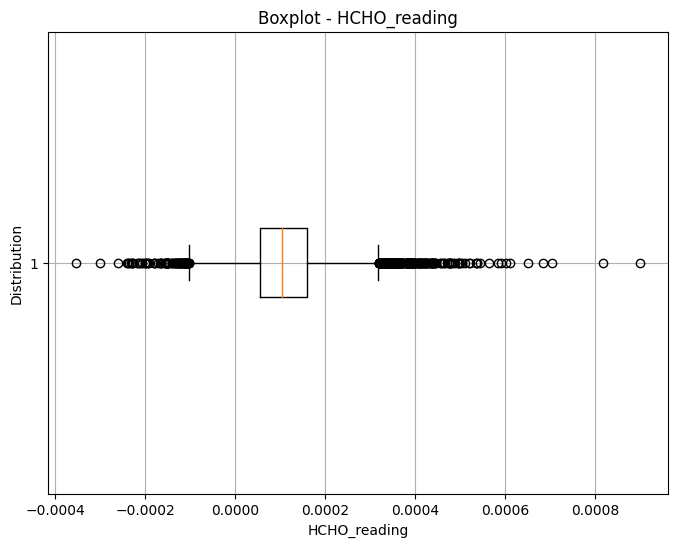

In [28]:
hcho_reading = sl_data.toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(hcho_reading["HCHO_reading"], vert=False)
plt.title('Boxplot - HCHO_reading')
plt.xlabel('HCHO_reading')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [29]:
# Detect outliers in the HCHO readings column
outliers_hcho = detect_outliers_iqr(sl_data, 'HCHO_reading')
print("The number of outliers in HCHO reading column :", outliers_hcho.count())
print("The number of rows in the dataframe :", sl_data.count())

The number of outliers in HCHO reading column : 433
The number of rows in the dataframe : 12782


In [30]:
sl_data = sl_data.subtract(outliers_hcho)
print("The number of rows in the dataframe :", sl_data.count())

The number of rows in the dataframe : 12349


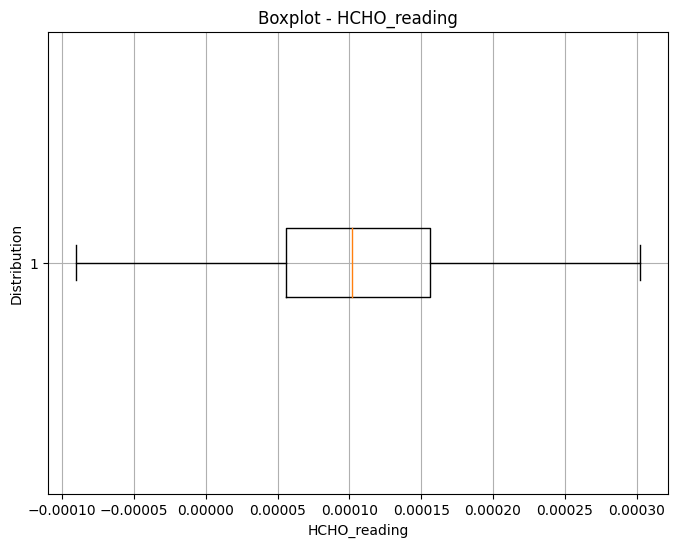

In [31]:
hcho_reading_data = sl_data.toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(hcho_reading_data.HCHO_reading, vert=False)
plt.title('Boxplot - HCHO_reading')
plt.xlabel('HCHO_reading')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

##Summarize dataset

In [32]:
#summary_df = sl_data.select
sl_data.groupBy('Location').agg(
    mean('HCHO_reading').alias('mean(HCHO_reading)'),
    median('HCHO_reading'),
    stddev('HCHO_reading')).show()

+-------------------+--------------------+--------------------+--------------------+
|           Location|  mean(HCHO_reading)|median(HCHO_reading)|stddev(HCHO_reading)|
+-------------------+--------------------+--------------------+--------------------+
|       Kandy Proper|9.875025137827734E-5| 9.55078276053089E-5|7.325666257898082E-5|
|   Deniyaya, Matara|8.727436114947471E-5|8.069735003350601E-5|7.085141737726277E-5|
|  Kurunegala Proper|1.196647759697170...|1.131715883095128...| 7.20201661425992E-5|
| Bibile, Monaragala|1.154192293799780...|1.147729833832740...|7.557023478754486E-5|
|     Colombo Proper|1.406286515999641...|1.370929537762054...|7.617789632007381E-5|
|Nuwara Eliya Proper|8.215463186454957E-5|7.614431953481086E-5|6.914954177956832E-5|
|      Jaffna Proper|1.035889472938799...|9.853363920911935E-5|6.290372462092314E-5|
+-------------------+--------------------+--------------------+--------------------+



In [33]:
sl_data.agg(
    mean('HCHO_reading').alias('mean(HCHO_reading)'),
    median('HCHO_reading'),
    stddev('HCHO_reading')).show()

+--------------------+--------------------+--------------------+
|  mean(HCHO_reading)|median(HCHO_reading)|stddev(HCHO_reading)|
+--------------------+--------------------+--------------------+
|1.065202631491853E-4|1.018427415577984...|7.385761253169519E-5|
+--------------------+--------------------+--------------------+



## Boxplots & Histograms

In [34]:
pd_sl_data = sl_data.toPandas()

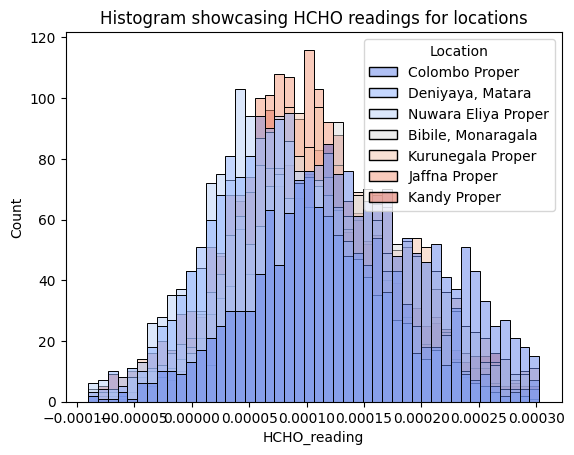

In [35]:
sns.histplot(x='HCHO_reading', palette='coolwarm', hue='Location', data=pd_sl_data)
plt.title("Histogram showcasing HCHO readings for locations")
plt.show()

<ipython-input-36-3d514ab50425>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HCHO_reading', palette='coolwarm', y='Location', data=pd_sl_data)


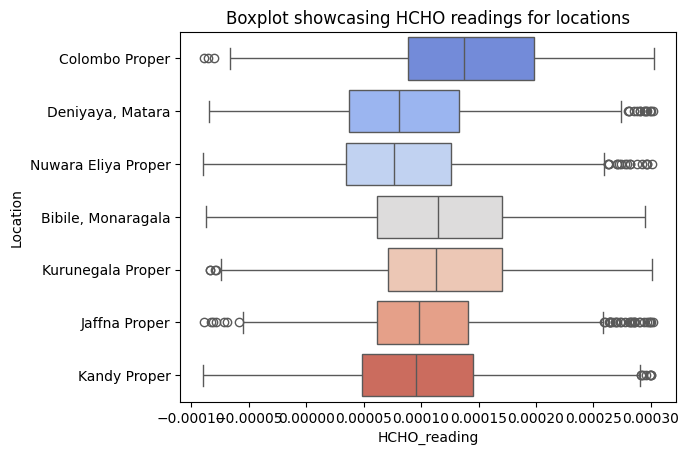

In [36]:
sns.boxplot(x='HCHO_reading', palette='coolwarm', y='Location', data=pd_sl_data)
plt.title("Boxplot showcasing HCHO readings for locations")
plt.show()

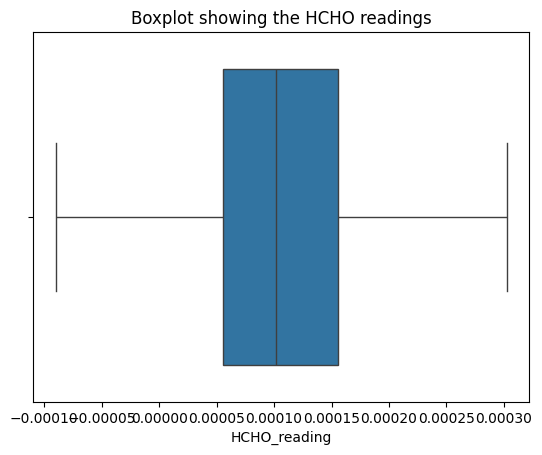

In [37]:
sns.boxplot(x='HCHO_reading', data=pd_sl_data)
plt.title('Boxplot showing the HCHO readings')
plt.show()

#Spatio-Temporal Analysis

##Analysis of trends over time

In [38]:
hcho_data = sl_data.toPandas()

# Convert 'Current_Date' column to datetime if it's not already
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])


Analysis for Colombo Proper:


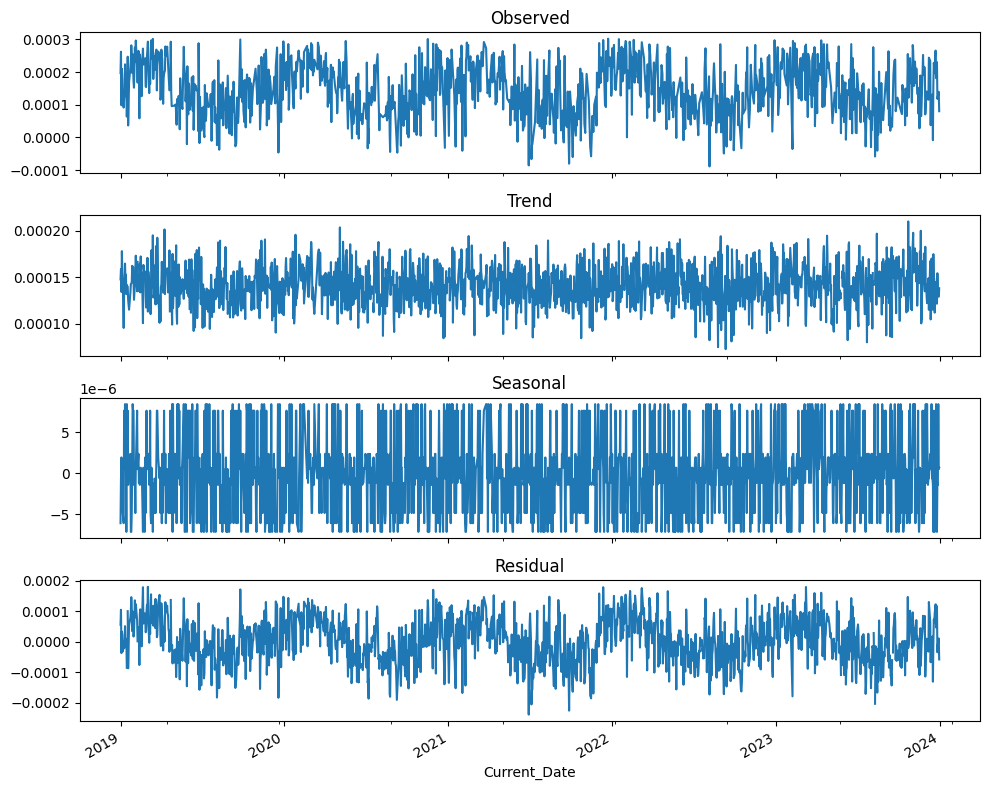

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

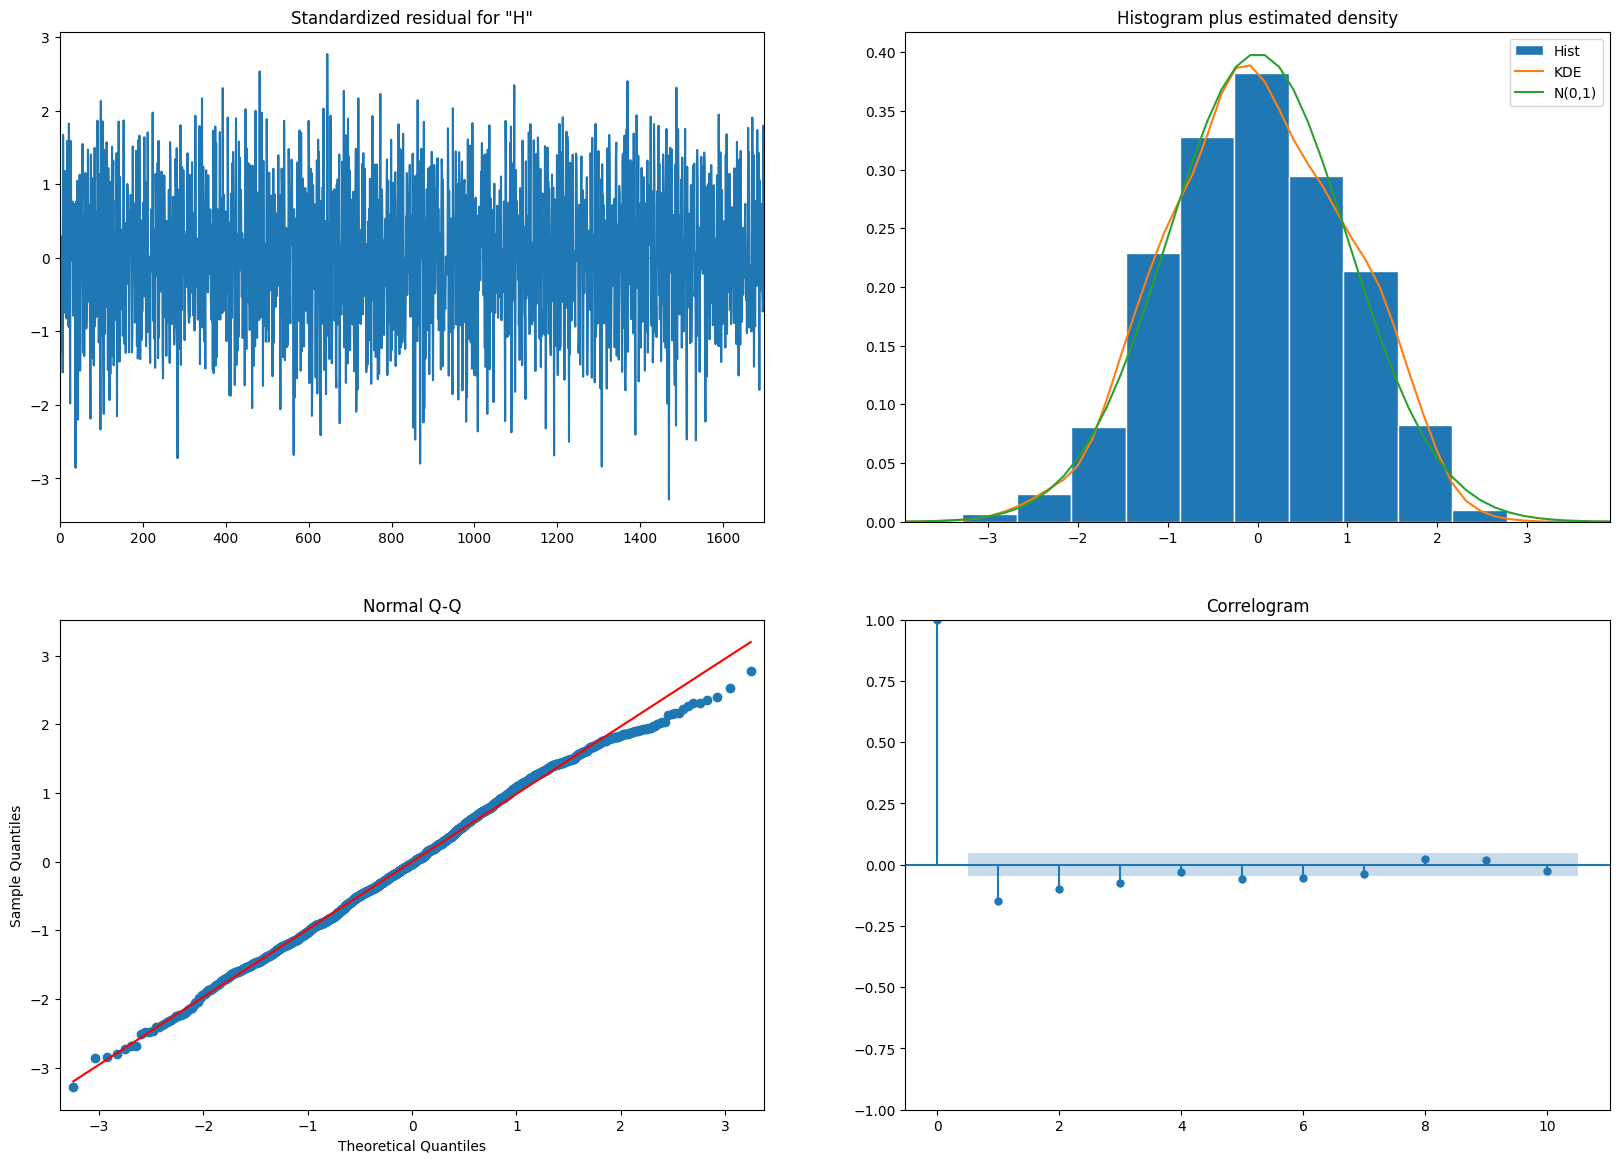

                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 1701
Model:                 ARIMA(1, 1, 1)   Log Likelihood               13578.113
Date:                Wed, 17 Apr 2024   AIC                         -27150.226
Time:                        16:36:53   BIC                         -27133.911
Sample:                             0   HQIC                        -27144.186
                               - 1701                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0025   4.92e-19   5.07e+15      0.000       0.002       0.002
ma.L1         -0.7623   1.54e-18  -4.96e+17      0.000      -0.762      -0.762
sigma2      6.601e-09   2.73e-10     24.141      0.0

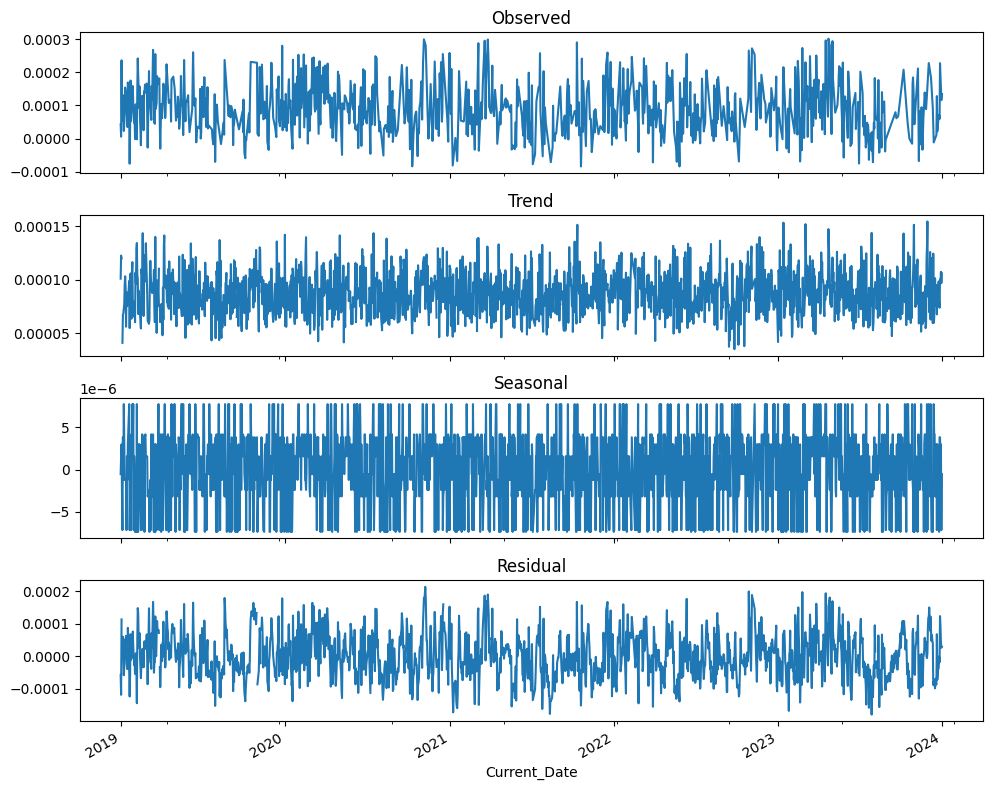

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 1768
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14216.272
Date:                Wed, 17 Apr 2024   AIC                         -28426.545
Time:                        16:36:56   BIC                         -28410.114
Sample:                             0   HQIC                        -28420.474
                               - 1768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0187   3.69e-19   5.05e+16      0.000       0.019       0.019
ma.L1         -0.7385   7.59e-19  -9.73e+17      0.000      -0.738      -0.738
sigma2      4.857e-09   1.61e-10     30.176      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

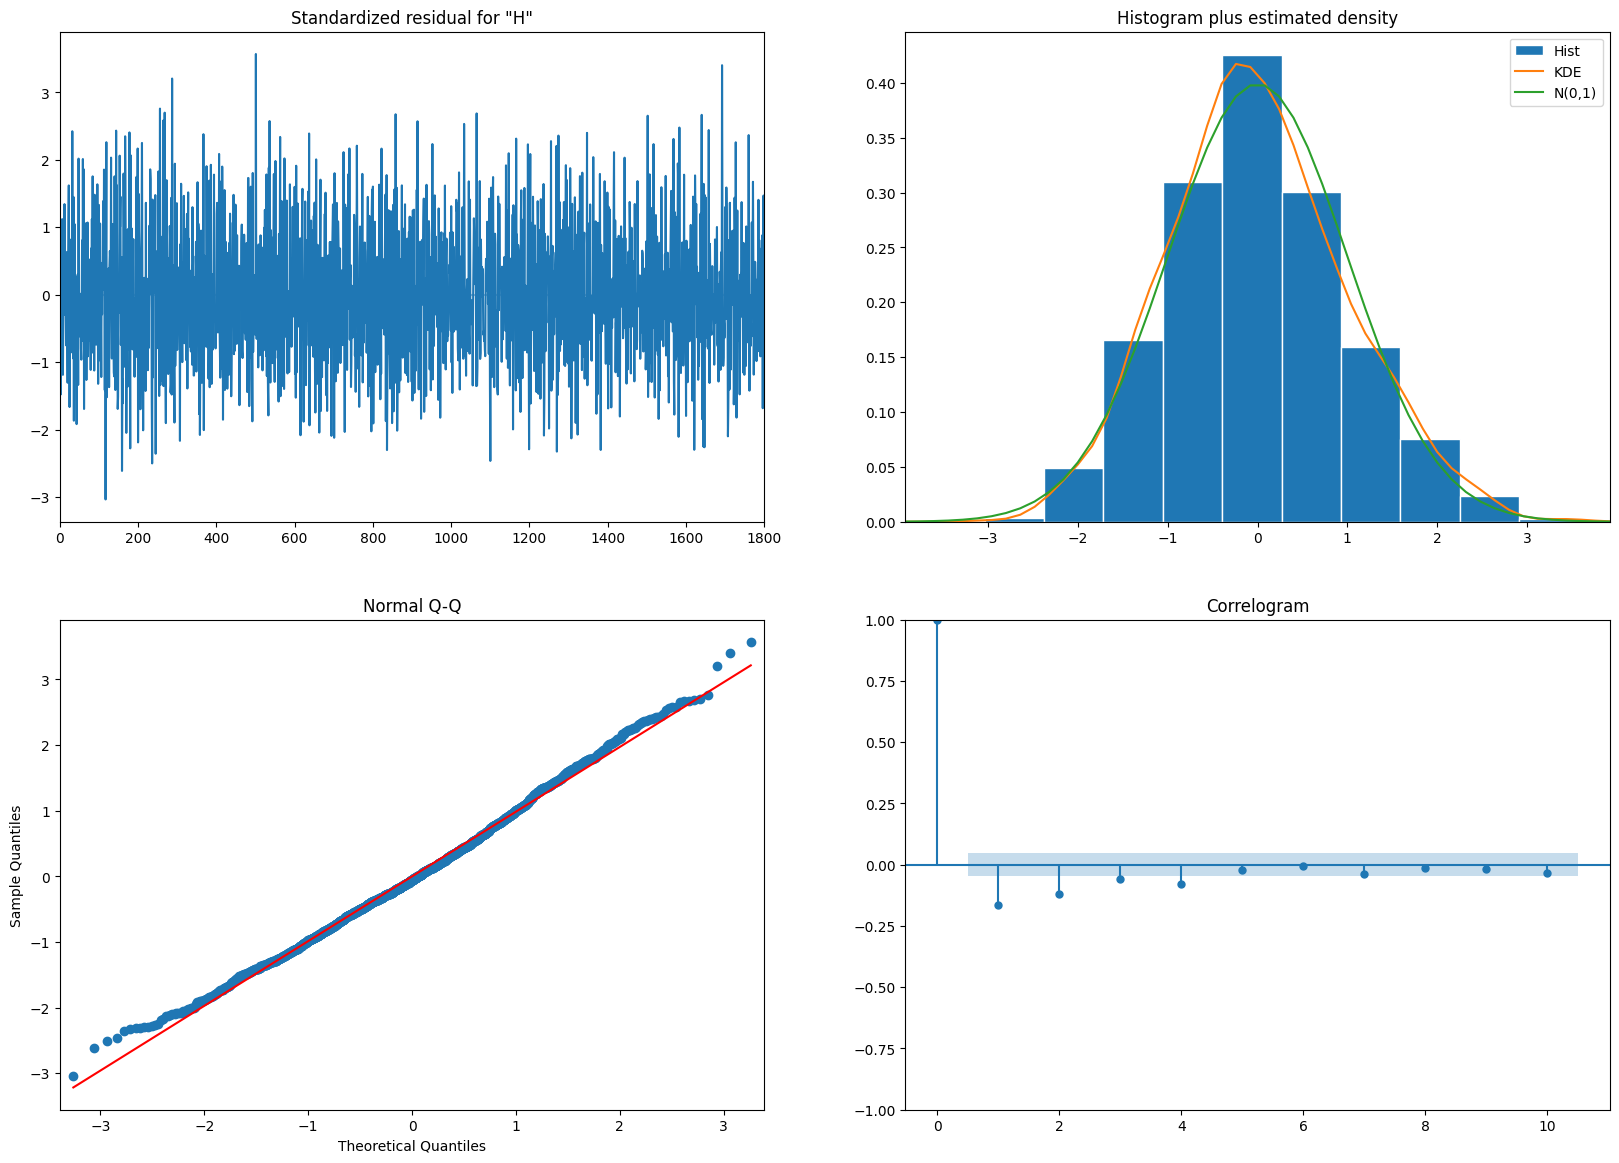

                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 1802
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14527.080
Date:                Wed, 17 Apr 2024   AIC                         -29048.159
Time:                        16:37:00   BIC                         -29031.671
Sample:                             0   HQIC                        -29042.073
                               - 1802                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0152   4.86e-19  -3.13e+16      0.000      -0.015      -0.015
ma.L1         -0.7512   1.01e-18  -7.46e+17      0.000      -0.751      -0.751
sigma2       5.42e-09   2.02e-10     26.876      0.0

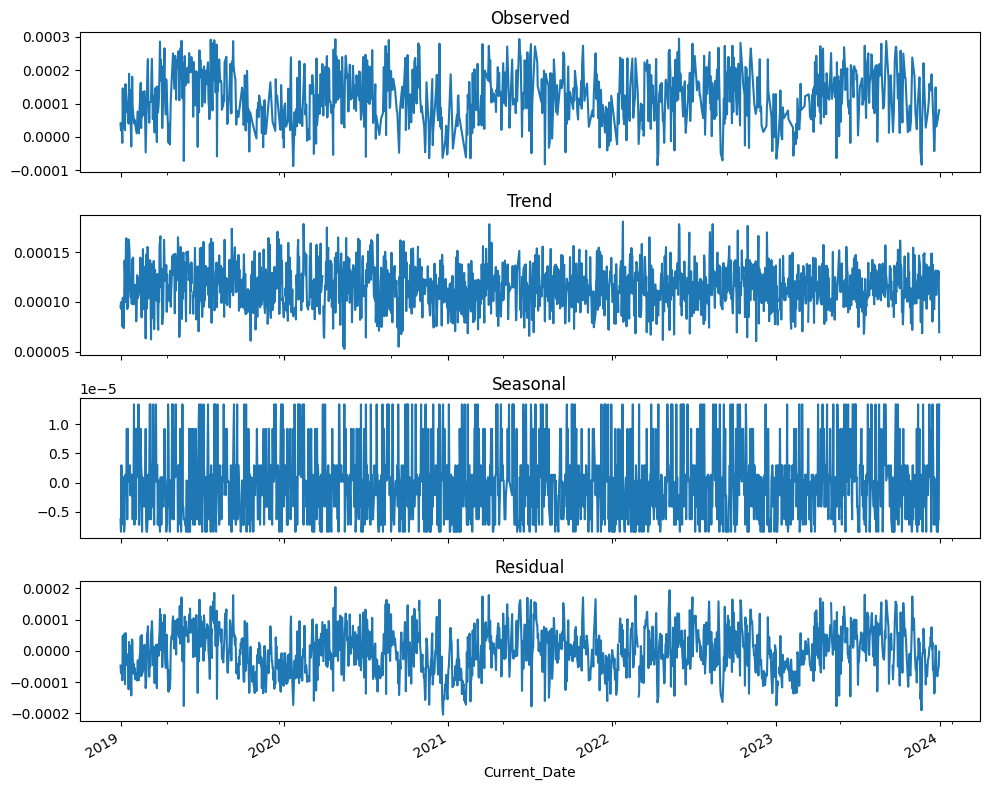

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 1755
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14018.562
Date:                Wed, 17 Apr 2024   AIC                         -28031.123
Time:                        16:37:04   BIC                         -28014.715
Sample:                             0   HQIC                        -28025.058
                               - 1755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1223   1.11e-18   1.11e+17      0.000       0.122       0.122
ma.L1         -0.7971   1.97e-18  -4.04e+17      0.000      -0.797      -0.797
sigma2      6.887e-09   2.92e-10     23.566      0.0

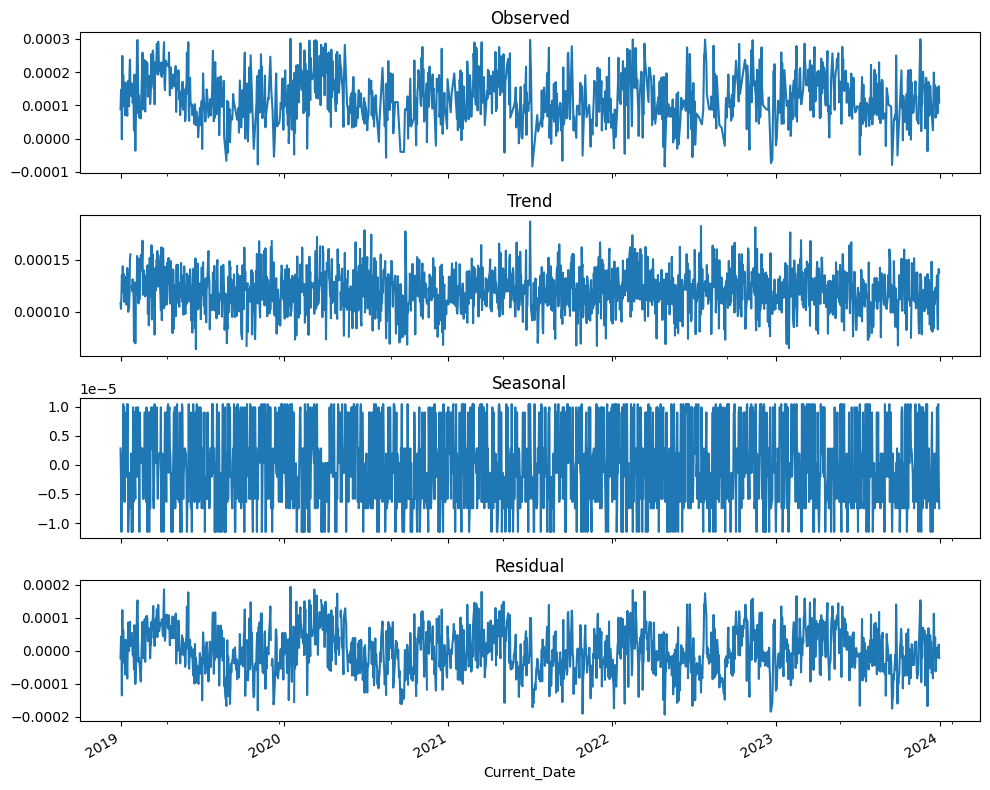

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm


Analysis for Jaffna Proper:


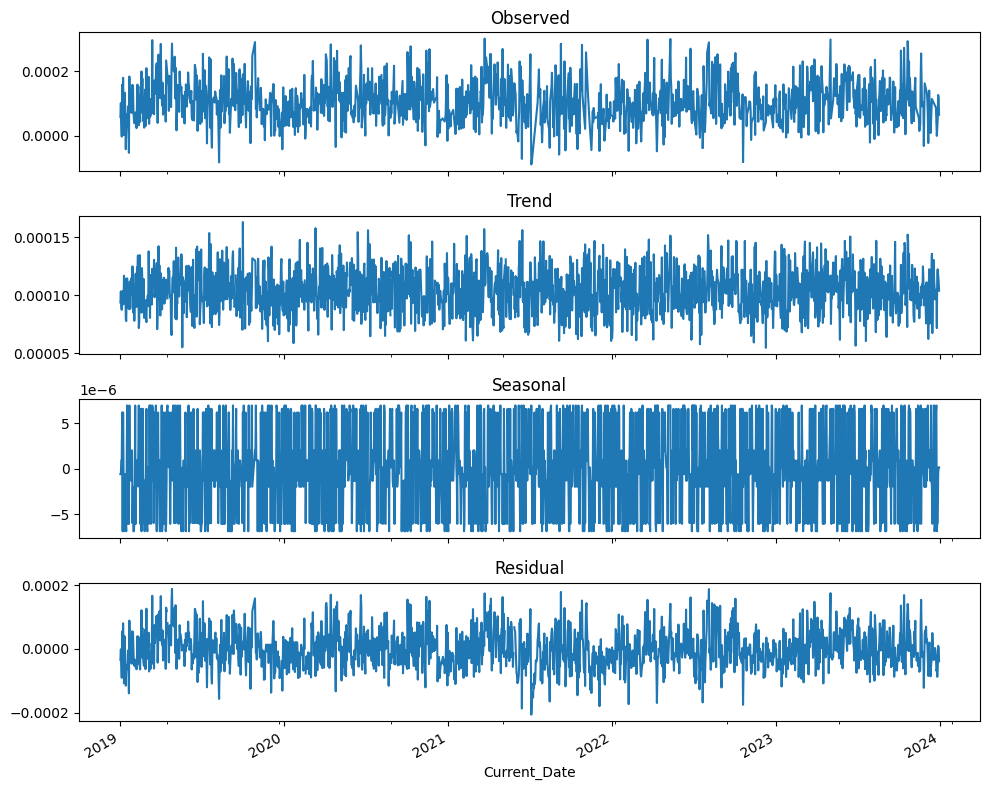

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 1781
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14550.333
Date:                Wed, 17 Apr 2024   AIC                         -29094.666
Time:                        16:37:10   BIC                         -29078.213
Sample:                             0   HQIC                        -29088.589
                               - 1781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0017   2.54e-19   6.88e+15      0.000       0.002       0.002
ma.L1         -0.7284   6.21e-19  -1.17e+18      0.000      -0.728      -0.728
sigma2      4.495e-09   1.64e-10     27.448      0.0

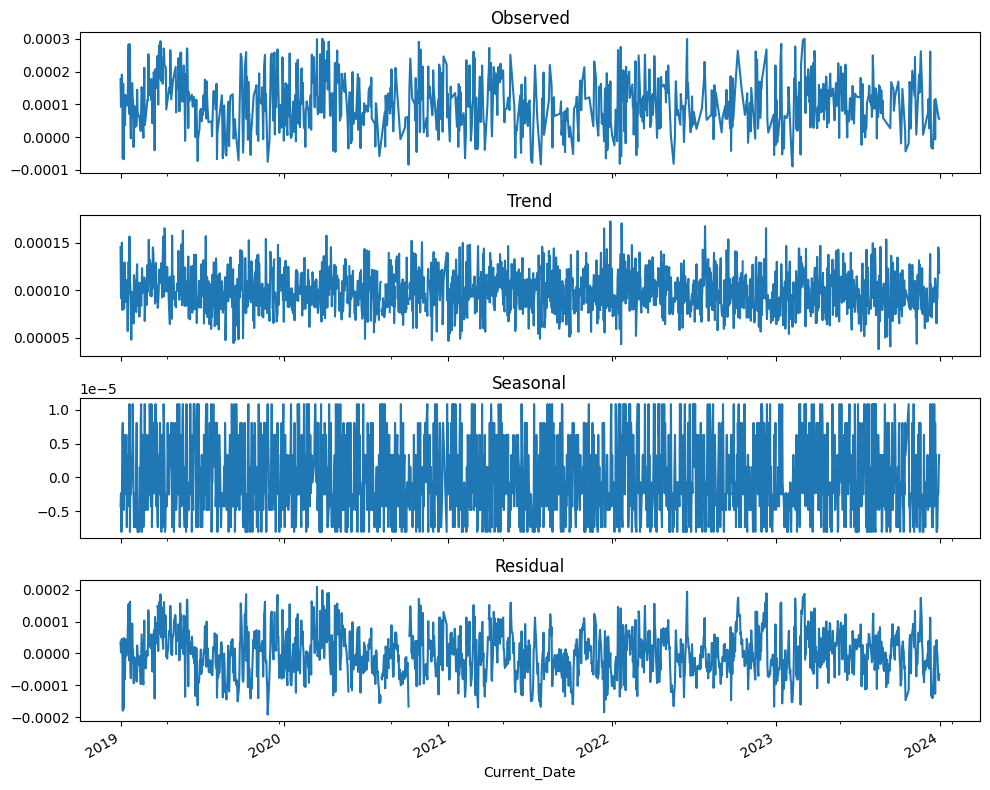

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have loaded your HCHO data into a DataFrame named 'hcho_data'
# with columns 'City', 'Date', and 'HCHO_Level'

# Define a function to perform time series analysis for each city
def analyze_city(city_data, city):
    # Perform seasonal decomposition
    result = seasonal_decompose(city_data['HCHO_reading'], model='additive', period=12)

    # Plot decomposed components
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    result.observed.plot(ax=axes[0], title='Observed')
    result.trend.plot(ax=axes[1], title='Trend')
    result.seasonal.plot(ax=axes[2], title='Seasonal')
    result.resid.plot(ax=axes[3], title='Residual')
    plt.tight_layout()
    plt.show()

    # Fit ARIMA model
    model = ARIMA(city_data['HCHO_reading'], order=(1, 1, 1))
    fitted_model = model.fit()

    if city != "Kurunegala Proper" and city != "Kandy Proper":
      fitted_model.plot_diagnostics(figsize=(20, 14))
      plt.show()
      # Print model summary
      print(fitted_model.summary())


# Iterate over unique cities in the data
for city in hcho_data['Location'].unique():
    city_data = hcho_data[hcho_data['Location'] == city].copy()
    city_data.set_index('Current_Date', inplace=True)

    print(f"\nAnalysis for {city}:")
    analyze_city(city_data, city)


##HCHO emissions during the Covid-19 period

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'location', 'date', and 'hcho_reading' are columns in your DataFrame
# Get unique locations
locations = hcho_data['Location'].unique()

# Create subplots for each location
fig, axs = plt.subplots(len(locations), 1, figsize=(10, 6 * len(locations)), sharex=True)

# Plotting scatter plot for each location with empty circles
for i, location in enumerate(locations):
    data = hcho_data[hcho_data['Location'] == location]

    # Filter data for years 2020 and 2021
    data_2020_2021 = data[(data['Current_Date'].dt.year == 2020) | (data['Current_Date'].dt.year == 2021)]

    axs[i].scatter(data_2020_2021['Current_Date'], data_2020_2021['HCHO_reading'], s=40, facecolors='none', edgecolors='r')
    plt.xlabel('Year')
    axs[i].set_ylabel('HCHO Reading')
    axs[i].set_title(f'HCHO Reading Over Time - {location}')

    # Increase spacing between x-axis ticks
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.subplots_adjust(wspace=0.3)  # Adjust horizontal spacing between subplots

plt.show()


## Add external factors to the dataframe

In [41]:
from pyspark.sql import functions as F

In [42]:
sl_data = sl_data.withColumn(
    "Population_Density",
    F.when(col("Location").isin(["Colombo Proper", "Jaffna Proper", "Kandy Proper"]), "High")
    .when(col("Location").isin(["Nuwara Eliya Proper", "Kurunegala Proper"]), "Moderate")
    .when(col("Location").isin(["Deniyaya, Matara", "Bibile, Monaragala"]), "Moderate")
    .otherwise(None)
)

sl_data = sl_data.withColumn(
    "Elevation",
    F.when(col("Location").isin(["Colombo Proper", "Jaffna Proper", "Deniyaya, Matara"]), "Low")
    .when(col("Location").isin(["Nuwara Eliya Proper", "Kurunegala Proper", "Kandy Proper", "Bibile, Monaragala"]), "High")
    .otherwise(None)
)

In [43]:
sl_data.show()

+--------------------+----------------+------------+------------------+---------+
|        HCHO_reading|        Location|Current_Date|Population_Density|Elevation|
+--------------------+----------------+------------+------------------+---------+
|1.181062250815020...|  Colombo Proper|  2019-01-16|              High|      Low|
|2.650819171274837...|  Colombo Proper|  2019-02-10|              High|      Low|
|1.711205695593238...|  Colombo Proper|  2019-04-22|              High|      Low|
|9.371377986679586E-5|  Colombo Proper|  2019-06-05|              High|      Low|
|5.047959159020286E-5|  Colombo Proper|  2019-07-10|              High|      Low|
|1.236878481460672...|  Colombo Proper|  2020-07-16|              High|      Low|
|1.151393206812509...|  Colombo Proper|  2021-05-18|              High|      Low|
|1.479975745792452E-4|  Colombo Proper|  2021-10-28|              High|      Low|
|3.582195972256424E-7|  Colombo Proper|  2022-02-03|              High|      Low|
|2.3341453119243

##Correlation of HCHO reading with external factors

In [44]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

In [45]:
df_corr = sl_data
# StringIndexer for encoding categorical columns
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index")
    for column in ['Elevation', 'Population_Density']
]


# OneHotEncoder for one-hot encoding indexed categorical columns
encoders = [
    OneHotEncoder(inputCol=column+"_index", outputCol=column+"_onehot")
    for column in ['Elevation', 'Population_Density']
]

# Assemble all the features into a single vector
assembler = VectorAssembler(
    inputCols=['HCHO_reading'] + [column+"_onehot" for column in ['Elevation', 'Population_Density']],
    outputCol="features"
)



In [46]:
# Pipeline for transformation
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Fit and transform the data
transformed_df = pipeline.fit(df_corr).transform(df_corr)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(transformed_df, "features").head()

# Extract correlation matrix
corr_matrix = correlation_matrix[0].toArray()

# Extract columns names
column_names = ['HCHO_reading'] + ['Elevation', 'Population_Density']

In [47]:
print("HCHO_reading  Elevation   Population_Density")
print(corr_matrix)

HCHO_reading  Elevation   Population_Density
[[ 1.         -0.04163227 -0.08657416]
 [-0.04163227  1.          0.4137356 ]
 [-0.08657416  0.4137356   1.        ]]


In [48]:
sl_data.show()

+--------------------+----------------+------------+------------------+---------+
|        HCHO_reading|        Location|Current_Date|Population_Density|Elevation|
+--------------------+----------------+------------+------------------+---------+
|1.181062250815020...|  Colombo Proper|  2019-01-16|              High|      Low|
|2.650819171274837...|  Colombo Proper|  2019-02-10|              High|      Low|
|1.711205695593238...|  Colombo Proper|  2019-04-22|              High|      Low|
|9.371377986679586E-5|  Colombo Proper|  2019-06-05|              High|      Low|
|5.047959159020286E-5|  Colombo Proper|  2019-07-10|              High|      Low|
|1.236878481460672...|  Colombo Proper|  2020-07-16|              High|      Low|
|1.151393206812509...|  Colombo Proper|  2021-05-18|              High|      Low|
|1.479975745792452E-4|  Colombo Proper|  2021-10-28|              High|      Low|
|3.582195972256424E-7|  Colombo Proper|  2022-02-03|              High|      Low|
|2.3341453119243

In [49]:
sl_data.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Population_Density: string (nullable = true)
 |-- Elevation: string (nullable = true)



##Compare spatial patterns

#Machine Learning model

In [50]:
sl_hcho_data = sl_data

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

In [52]:

indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index")
    for column in ['Location', 'Elevation', 'Population_Density']
]
pipeline = Pipeline(stages=indexers)
sl_hcho_data_r = pipeline.fit(sl_hcho_data).transform(sl_hcho_data)

In [53]:
# #test Apply OneHotEncoder to each indexed column
# encoded_data = sl_hcho_data
# for encoder in encoders:
#     encoded_data = encoder.fit(encoded_data).transform(encoded_data)

# Assemble all features into a single feature vector column
assembler = VectorAssembler(
    inputCols= ['Location_index', 'Elevation_index', 'Population_Density_index'],
    outputCol="features"
)

# Transform the data using the VectorAssembler
transformed_sl_data = assembler.transform(sl_hcho_data_r)

In [55]:
sl_hcho_data.filter(col("HCHO_reading").isNull() | col("Elevation").isNull() | col("Population_Density").isNull()).show()

+------------+--------+------------+------------------+---------+
|HCHO_reading|Location|Current_Date|Population_Density|Elevation|
+------------+--------+------------+------------------+---------+
+------------+--------+------------+------------------+---------+



In [56]:
sl_hcho_data.show()

+--------------------+----------------+------------+------------------+---------+
|        HCHO_reading|        Location|Current_Date|Population_Density|Elevation|
+--------------------+----------------+------------+------------------+---------+
|1.181062250815020...|  Colombo Proper|  2019-01-16|              High|      Low|
|2.650819171274837...|  Colombo Proper|  2019-02-10|              High|      Low|
|1.711205695593238...|  Colombo Proper|  2019-04-22|              High|      Low|
|9.371377986679586E-5|  Colombo Proper|  2019-06-05|              High|      Low|
|5.047959159020286E-5|  Colombo Proper|  2019-07-10|              High|      Low|
|1.236878481460672...|  Colombo Proper|  2020-07-16|              High|      Low|
|1.151393206812509...|  Colombo Proper|  2021-05-18|              High|      Low|
|1.479975745792452E-4|  Colombo Proper|  2021-10-28|              High|      Low|
|3.582195972256424E-7|  Colombo Proper|  2022-02-03|              High|      Low|
|2.3341453119243

In [57]:
from pyspark.ml.linalg import Vectors, VectorUDT

In [58]:
transformed_sl_data.show()

+--------------------+----------------+------------+------------------+---------+--------------+---------------+------------------------+-------------+
|        HCHO_reading|        Location|Current_Date|Population_Density|Elevation|Location_index|Elevation_index|Population_Density_index|     features|
+--------------------+----------------+------------+------------------+---------+--------------+---------------+------------------------+-------------+
|1.181062250815020...|  Colombo Proper|  2019-01-16|              High|      Low|           6.0|            1.0|                     1.0|[6.0,1.0,1.0]|
|2.650819171274837...|  Colombo Proper|  2019-02-10|              High|      Low|           6.0|            1.0|                     1.0|[6.0,1.0,1.0]|
|1.711205695593238...|  Colombo Proper|  2019-04-22|              High|      Low|           6.0|            1.0|                     1.0|[6.0,1.0,1.0]|
|9.371377986679586E-5|  Colombo Proper|  2019-06-05|              High|      Low|       

In [59]:
transformed_sl_data.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Population_Density: string (nullable = true)
 |-- Elevation: string (nullable = true)
 |-- Location_index: double (nullable = false)
 |-- Elevation_index: double (nullable = false)
 |-- Population_Density_index: double (nullable = false)
 |-- features: vector (nullable = true)



In [60]:
!pip install tensorflow

In [61]:
# Import necessary libraries
from pyspark.sql.functions import col
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Convert date to timestamp
transformed_sl_data = transformed_sl_data.withColumn("timestamp", col("Current_Date").cast("timestamp"))
transformed_sl_data = transformed_sl_data.orderBy("timestamp")

pd_transformed_data = transformed_sl_data.toPandas()

In [63]:
# Prepare data for LSTM
X = np.array(pd_transformed_data["features"].tolist())
y = np.array(pd_transformed_data["HCHO_reading"])


In [64]:
print(X.shape)


(12349, 3)


In [65]:
X = X.reshape(X.shape[0], 1, X.shape[1])

Epoch 1/100
386/386 [==============================] - 12s 14ms/step - loss: 1.3490e-07
Epoch 2/100
386/386 [==============================] - 4s 11ms/step - loss: 7.6888e-09
Epoch 3/100
386/386 [==============================] - 4s 10ms/step - loss: 1.1573e-08
Epoch 4/100
386/386 [==============================] - 4s 10ms/step - loss: 2.3682e-08
Epoch 5/100
386/386 [==============================] - 3s 9ms/step - loss: 1.4520e-08
Epoch 6/100
386/386 [==============================] - 3s 8ms/step - loss: 2.2366e-08
Epoch 7/100
386/386 [==============================] - 4s 12ms/step - loss: 1.4789e-08
Epoch 8/100
386/386 [==============================] - 3s 9ms/step - loss: 2.1314e-08
Epoch 9/100
386/386 [==============================] - 4s 9ms/step - loss: 1.1688e-08
Epoch 10/100
386/386 [==============================] - 2s 6ms/step - loss: 1.5860e-08
Epoch 11/100
386/386 [==============================] - 2s 6ms/step - loss: 1.6217e-08
Epoch 12/100
386/386 [========================

<ipython-input-66-01c28f6725ae>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


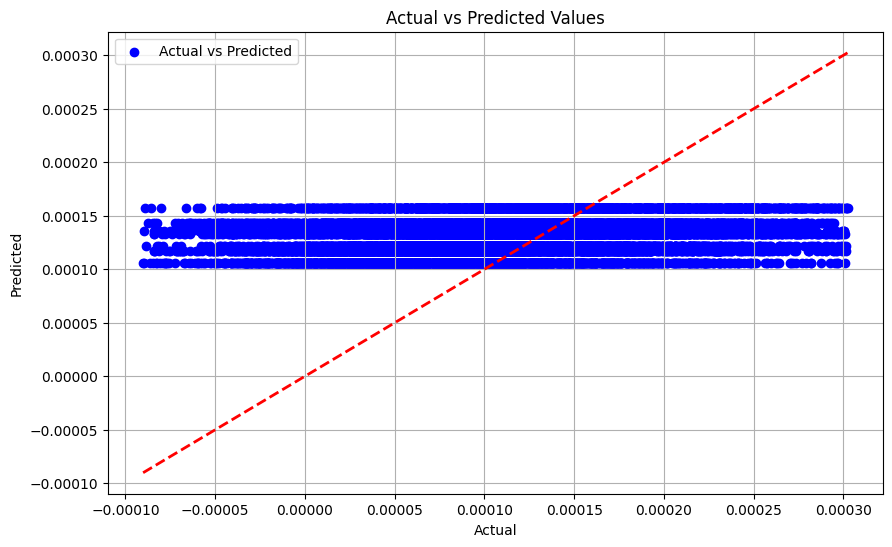

In [66]:
# Define LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, predictions)

# Calculate R-squared
r2 = r2_score(y, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)



# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()
# Close SparkSession
spark.stop()

In [67]:
print(predictions)

[[0.00014283]
 [0.00015738]
 [0.00010603]
 ...
 [0.00013561]
 [0.00012139]
 [0.00014283]]
